In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math

C:\Users\leozhao\AppData\Local\Temp\ipykernel_28796\1837846541.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('./data/covid-hospitalization-daily-all-state-merged_vEW202248.csv')


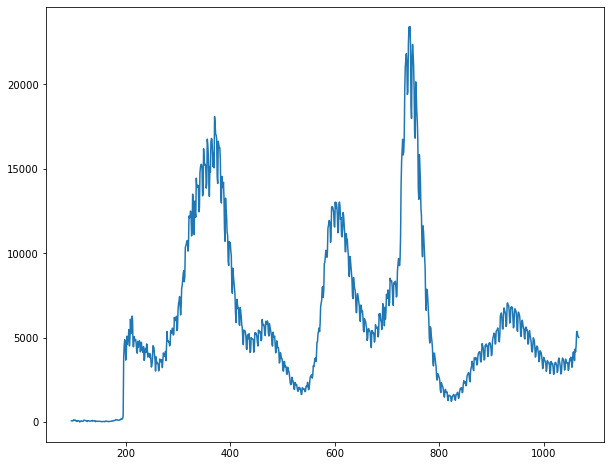

In [13]:
raw_data = pd.read_csv('./data/covid-hospitalization-daily-all-state-merged_vEW202248.csv')
local_data = raw_data[raw_data['region'] == 'X']
hosp_data = local_data['cdc_hospitalized'].to_numpy()
plt.figure(figsize=(10,8))
plt.plot(hosp_data)
plt.show()

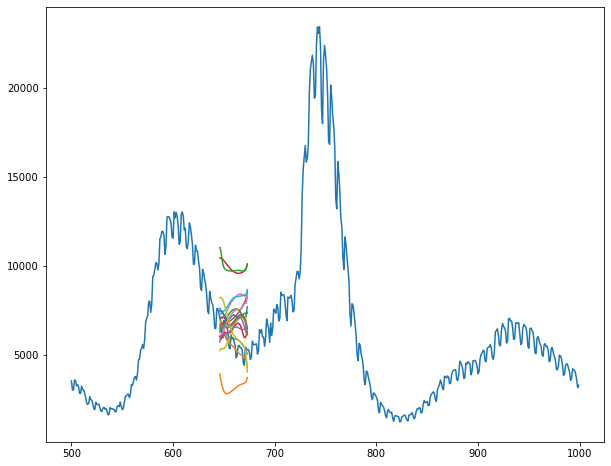

In [14]:
# plot trajs

num_traj = 50

plt.figure(figsize=(10,8))
plt.plot(range(500,1000), hosp_data[500:1000])

for i in range(num_traj):
    try:
        raw_pred = pd.read_csv('./results/201/X/preds_hosptraj{}_202140_exp201.csv'.format(i))
        pred = raw_pred['hospitalization'].to_numpy()
        plt.plot(range((40)*7+1+365,(40+4)*7+1+365), pred)

    except:
        continue

plt.show()

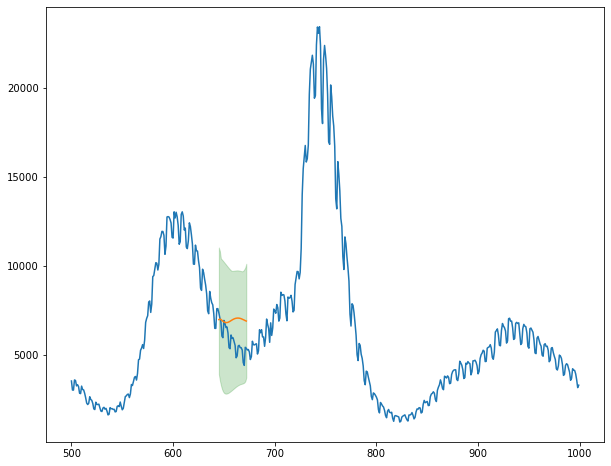

In [15]:
# plot confidence interval

num_traj = 50
pred_data = []


for i in range(num_traj):
    try:
        raw_pred = pd.read_csv('./results/201/X/preds_hosptraj{}_202140_exp201.csv'.format(i))
        pred = raw_pred['hospitalization'].to_numpy()

        pred = pred[~pd.isnull(pred)]
        if len(pred) == 28:
            pred_data.append(pred)

    except:
        continue


pred_data = np.array(pred_data)

plt.figure(figsize=(10,8))
plt.plot(range(500,1000), hosp_data[500:1000])
plt.plot(range((52+40)*7+1,(52+40+4)*7+1), np.mean(pred_data, axis=0))
plt.fill_between(range((52+40)*7+1,(52+40+4)*7+1), np.max(pred_data, axis=0), np.min(pred_data, axis=0), color='green', alpha=0.2)
plt.show()

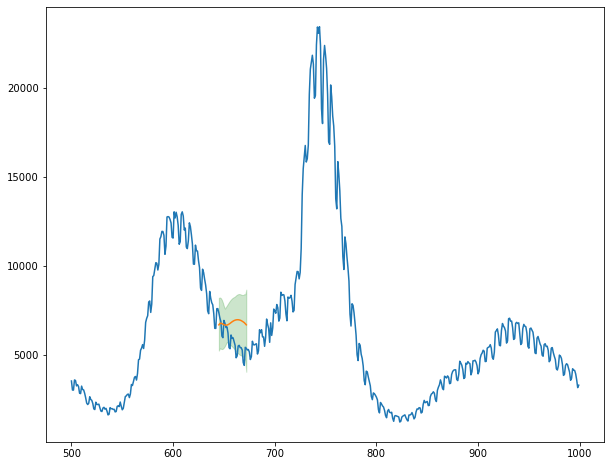

In [16]:
# plot mod confidence interval

num_traj = 50
pred_data = []


for i in range(num_traj):
    try:
        raw_pred = pd.read_csv('./results/201/X/preds_hosptraj{}_202140_exp201.csv'.format(i))
        pred = raw_pred['hospitalization'].to_numpy()

        pred = pred[~pd.isnull(pred)]
        if len(pred) == 28:
            pred_data.append(pred)

    except:
        continue


pred_data = np.array(pred_data)
pred_data = np.sort(pred_data, axis=0)

pred_data = pred_data[1:-2]

plt.figure(figsize=(10,8))
plt.plot(range(500,1000), hosp_data[500:1000])
plt.plot(range((52+40)*7+1,(52+40+4)*7+1), np.mean(pred_data, axis=0))
plt.fill_between(range((52+40)*7+1,(52+40+4)*7+1), np.max(pred_data, axis=0), np.min(pred_data, axis=0), color='green', alpha=0.2)
plt.show()